In [1]:
import pyodbc
import pandas as pd
from pycaret.classification import setup, compare_models

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"        # default instance
    "DATABASE=LOAN_PORTFOLIO_DB;"
    "Trusted_Connection=yes"   # use Windows Authentication
)

In [3]:
customer_df = pd.read_sql("SELECT * FROM CUSTOMER_DETAILS", conn)
account_df = pd.read_sql("SELECT * FROM ACCOUNT_DETAILS", conn)
transaction_df = pd.read_sql("SELECT * FROM TRANSACTION_DETAILS", conn)
loan_cashflow_df = pd.read_sql("SELECT * FROM LOAN_CASHFLOW", conn)
repayment_df = pd.read_sql("SELECT * FROM REPAYMENT", conn)

In [4]:
account_df

,MASKED_ID,ACC_MASKED_ID,TERM,TERM_AMOUNT,OOD,ACTIVE_PRODUCT,ORIG_CONTRACT_DATE,ACCT_CLOSE_DATE,ACCT_STATUS,MONTHEND_CONVERTED_BALANCE,CONVERTED_BALANCE,JUN_25,JUL_25,AUG_25,SEP_25,OCT_25,NOV_25
0,000454,BB00106DV0L7,None,NaN,NaN,SAVINGS ACCOUNT,2022-11-24,None,ACTIVE,4.207961e+05,1.761807e+04,5.816745e+04,7.188120e+04,1.290630e+03,1.952680e+03,1.506377e+04,2.226882e+05
1,000454,BB00106F1DX0,60M,500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-11-24,None,ACTIVE,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
2,000454,BB00106L3ZVN,1097D,400000.0,NaN,LOAN ACCOUNT,2022-11-24,2025-12-03,CLOSE,NaN,NaN,-6.444448e+04,-5.304663e+04,-4.322869e+04,-3.287300e+04,-2.233317e+04,-1.130280e+04
3,000454,BB00133NSWRT,369D,2375000.0,NaN,LOAN ACCOUNT,2022-12-21,2023-11-10,CLOSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000454,BB00138PNPFT,60M,2500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-12-16,None,ACTIVE,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9998721,BB09079RPQ53,None,NaN,NaN,SAVINGS ACCOUNT,2014-06-30,None,ACTIVE,3.654700e+02,9.254700e+02,2.586855e+04,2.701799e+04,3.078505e+04,4.528308e+04,2.068335e+04,8.629330e+03
8516,9999535,BB02118R8W32,None,NaN,NaN,SAVINGS ACCOUNT,2024-11-25,None,ACTIVE,8.833616e+04,8.211600e+02,1.016601e+05,1.156048e+06,5.234788e+04,6.728861e+04,1.164431e+05,1.327792e+05
8517,9999535,BB09079FWV46,None,NaN,NaN,SAVINGS ACCOUNT,2014-07-18,None,ACTIVE,7.789401e+05,2.758661e+05,1.404001e+04,6.464130e+03,1.243665e+05,7.613335e+04,2.626008e+05,8.083205e+05
8518,9999658,BB09079VJS24,None,NaN,NaN,SAVINGS ACCOUNT,2014-04-30,None,ACTIVE,5.454049e+04,4.559549e+04,5.743928e+04,6.547739e+04,7.128710e+04,7.698738e+04,7.129555e+04,4.570675e+04


In [5]:
customer_df
customer_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,MARITAL_STATUS,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,MARRIED,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,SINGLE,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS"
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,None,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,None,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,MARRIED,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,SINGLE,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2505,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,SINGLE,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2506,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,MARRIED,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2507,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,MARRIED,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...


# Rule 1

In [6]:
customer_df['Eligibility_Flag'] = 'ELIGIBLE'
customer_df['Rejection_Reason'] = None

In [7]:
customer_df.loc[
    (customer_df['AGE'] < 18) | (customer_df['AGE'] > 80),
    ['Eligibility_Flag', 'Rejection_Reason']
] = ['REJECT', 'Regulatory Age Restriction']


In [8]:
customer_df[customer_df['Eligibility_Flag'] == 'REJECT'][['AGE', 'Eligibility_Flag', 'Rejection_Reason']]


,AGE,Eligibility_Flag,Rejection_Reason
1342,88,REJECT,Regulatory Age Restriction
1394,90,REJECT,Regulatory Age Restriction
1912,90,REJECT,Regulatory Age Restriction
2015,99,REJECT,Regulatory Age Restriction
2124,81,REJECT,Regulatory Age Restriction
2160,82,REJECT,Regulatory Age Restriction
2369,82,REJECT,Regulatory Age Restriction


In [9]:
customer_df['Eligibility_Flag'].value_counts()


ELIGIBLE    2502
REJECT         7
Name: Eligibility_Flag, dtype: int64

In [10]:
eligible_cus_df = customer_df[customer_df['Eligibility_Flag'] == 'ELIGIBLE'].copy()


# Rule 2

In [11]:
active_accounts = account_df[
    (account_df['ACCT_STATUS'] == 'ACTIVE') |
    (account_df['ACCT_CLOSE_DATE'].isna())
]

active_account_count = (
    active_accounts
    .groupby('MASKED_ID')
    .size()
    .reset_index(name='Number_of_Active_Accounts')
)

In [12]:
eligible_cus_df = eligible_cus_df.merge(
    active_account_count,
    on='MASKED_ID',
    how='left'
)

In [13]:

# if no accounts isnted of Nan use 0 
eligible_cus_df['Number_of_Active_Accounts'] = (
    eligible_cus_df['Number_of_Active_Accounts']
    .fillna(0)
    .astype(int)
)


In [14]:
# Step 1: Set ELSE condition (default)
eligible_cus_df['Eligibility_Flag'] = 'ELIGIBLE'
eligible_cus_df['Rejection_Reason'] = 'Existing Customer'

# Step 2: Apply IF condition
eligible_cus_df.loc[
    eligible_cus_df['Number_of_Active_Accounts'] == 0,
    ['Eligibility_Flag', 'Rejection_Reason']
] = ['REJECT', 'Non-Existing Customer']

In [15]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,MARITAL_STATUS,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,MARRIED,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,SINGLE,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,None,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,None,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,MARRIED,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,SINGLE,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,SINGLE,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,MARRIED,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,MARRIED,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1


In [16]:
eligible_cus_df['Number_of_Active_Accounts'].describe()

count    2502.000000
mean        2.107514
std         2.602868
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: Number_of_Active_Accounts, dtype: float64

In [17]:
eligible_cus_df['Number_of_Active_Accounts'].value_counts().sort_index()

0        9
1     1524
2      462
3      195
4       94
5       54
6       47
7       18
8       29
9        9
10      12
11      10
12      12
13       7
14       1
15       5
16       4
17       1
19       3
20       1
25       1
27       1
28       1
35       1
46       1
Name: Number_of_Active_Accounts, dtype: int64

In [18]:
eligible_cus_df['Eligibility_Flag'].unique()

array(['ELIGIBLE', 'REJECT'], dtype=object)

# Rule 3 

In [19]:
valid_employment_status = pd.read_sql(
    "SELECT DISTINCT EMPLOYMENT_STATUS FROM CUSTOMER_DETAILS",
    conn
)['EMPLOYMENT_STATUS'].dropna().tolist()

In [20]:
eligible_cus_df['Employment_Status_Flag'] = 'Valid Employment Status'

eligible_cus_df.loc[
    ~eligible_cus_df['EMPLOYMENT_STATUS'].isin(valid_employment_status),
    'Employment_Status_Flag'
] = 'Invalid Employment Status'

In [21]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5,Valid Employment Status
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2,Valid Employment Status
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1,Valid Employment Status
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2,Valid Employment Status
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status


In [22]:
# Check age range
print(eligible_cus_df['AGE'].min(), eligible_cus_df['AGE'].max())

# Check active accounts
print(eligible_cus_df['Number_of_Active_Accounts'].min())

# Check employment status
print(eligible_cus_df['EMPLOYMENT_STATUS'].unique())

# Check eligibility flag
print(eligible_cus_df['Eligibility_Flag'].unique())

19 80
0
['UNEMPLOYED' 'EMPLOYED' 'SELF-EMPLOYED' 'BUSINESS' 'STUDENT' 'RETIRED'
 'FREELANCE' None]
['ELIGIBLE' 'REJECT']


# Rule 4

In [23]:
eligible_cus_df['Employment_Segment'] = 'Other'

In [24]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin(['EMPLOYED', 'SELF-EMPLOYED', 'BUSINESS'])) &
    (eligible_cus_df['AGE'].between(18, 60)),
    'Employment_Segment'
] = 'Core Working Group'


In [25]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin(['UNEMPLOYED	', 'RETIRED', 'STUDENT', 'FREELANCE'])) &
    (eligible_cus_df['AGE'].between(18, 65)),
    'Employment_Segment'
] = 'Special Segment'

In [26]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin([
        'UNEMPLOYED', 'RETIRED', 'STUDENT', 'FREELANCE', 
        'EMPLOYED', 'SELF-EMPLOYED', 'BUSINESS'
    ])) &
    (~eligible_cus_df['AGE'].between(18, 60)),  # not between 18 and 60
    'Employment_Segment'
] = 'Not valid segment'

# Rule 5

In [27]:
eligible_cus_df['Age_Bucket'] = pd.cut(
    eligible_cus_df['AGE'],
    bins=[17, 25, 40, 60, 80],
    labels=['Young Adult', 'Adult', 'Middle-Aged', 'Senior']
)

In [28]:
eligible_cus_df['Age_Bucket'].value_counts(dropna=False)

Adult          1085
Middle-Aged     822
Young Adult     395
Senior          200
Name: Age_Bucket, dtype: int64

In [29]:
balance_cols = ['JUN_25', 'JUL_25', 'AUG_25', 'SEP_25', 'OCT_25', 'NOV_25']

In [30]:
account_df['Monthly_Avg_Balance'] = account_df[balance_cols].mean(axis=1)

In [31]:
account_df

,MASKED_ID,ACC_MASKED_ID,TERM,TERM_AMOUNT,OOD,ACTIVE_PRODUCT,ORIG_CONTRACT_DATE,ACCT_CLOSE_DATE,ACCT_STATUS,MONTHEND_CONVERTED_BALANCE,CONVERTED_BALANCE,JUN_25,JUL_25,AUG_25,SEP_25,OCT_25,NOV_25,Monthly_Avg_Balance
0,000454,BB00106DV0L7,None,NaN,NaN,SAVINGS ACCOUNT,2022-11-24,None,ACTIVE,4.207961e+05,1.761807e+04,5.816745e+04,7.188120e+04,1.290630e+03,1.952680e+03,1.506377e+04,2.226882e+05,6.184066e+04
1,000454,BB00106F1DX0,60M,500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-11-24,None,ACTIVE,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
2,000454,BB00106L3ZVN,1097D,400000.0,NaN,LOAN ACCOUNT,2022-11-24,2025-12-03,CLOSE,NaN,NaN,-6.444448e+04,-5.304663e+04,-4.322869e+04,-3.287300e+04,-2.233317e+04,-1.130280e+04,-3.787146e+04
3,000454,BB00133NSWRT,369D,2375000.0,NaN,LOAN ACCOUNT,2022-12-21,2023-11-10,CLOSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000454,BB00138PNPFT,60M,2500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-12-16,None,ACTIVE,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9998721,BB09079RPQ53,None,NaN,NaN,SAVINGS ACCOUNT,2014-06-30,None,ACTIVE,3.654700e+02,9.254700e+02,2.586855e+04,2.701799e+04,3.078505e+04,4.528308e+04,2.068335e+04,8.629330e+03,2.637789e+04
8516,9999535,BB02118R8W32,None,NaN,NaN,SAVINGS ACCOUNT,2024-11-25,None,ACTIVE,8.833616e+04,8.211600e+02,1.016601e+05,1.156048e+06,5.234788e+04,6.728861e+04,1.164431e+05,1.327792e+05,2.710945e+05
8517,9999535,BB09079FWV46,None,NaN,NaN,SAVINGS ACCOUNT,2014-07-18,None,ACTIVE,7.789401e+05,2.758661e+05,1.404001e+04,6.464130e+03,1.243665e+05,7.613335e+04,2.626008e+05,8.083205e+05,2.153209e+05
8518,9999658,BB09079VJS24,None,NaN,NaN,SAVINGS ACCOUNT,2014-04-30,None,ACTIVE,5.454049e+04,4.559549e+04,5.743928e+04,6.547739e+04,7.128710e+04,7.698738e+04,7.129555e+04,4.570675e+04,6.469891e+04


In [32]:
customer_balance_df = (
    account_df
    .groupby('MASKED_ID', as_index=False)['Monthly_Avg_Balance']
    .mean()
)


In [33]:
eligible_cus_df = eligible_cus_df.merge(
    customer_balance_df,
    on='MASKED_ID',
    how='left'
)


In [34]:
eligible_cus_df['Financial_Capacity'] = 'Unknown / Missing Balance Data'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'] >= 100000,
    'Financial_Capacity'
] = 'High Financial Capacity'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'].between(50000, 99999),
    'Financial_Capacity'
] = 'Medium Financial Capacity'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'] < 50000,
    'Financial_Capacity'
] = 'Low Financial Capacity'


In [35]:
eligible_cus_df[['Monthly_Avg_Balance', 'Financial_Capacity']].sample(10)

,Monthly_Avg_Balance,Financial_Capacity
2239,3.322630e+04,Low Financial Capacity
1680,-1.371565e+05,Low Financial Capacity
1425,1.390335e+04,Low Financial Capacity
980,1.594638e+03,Low Financial Capacity
1158,1.339986e+04,Low Financial Capacity
2483,1.792660e+03,Low Financial Capacity
1442,2.690103e+03,Low Financial Capacity
618,1.176594e+06,High Financial Capacity
952,4.975763e+06,High Financial Capacity
2084,2.814100e+02,Low Financial Capacity


# Rule 6

In [36]:
transaction_df

,MASK_TRAN_REF,ACC_MASKED_ID,MASKED_ID,AMOUNT_LCY,TRANSACTION_CODE,TRAN_NARRATIVE,BOOKING_DATE
0,9.825868e+13,BB02901VMKYW,014678,118500.0,774,CRM Cash Deposit,2025-08-15
1,9.814575e+13,BB02901VMKYW,014678,75000.0,774,CRM Cash Deposit,2025-08-04
2,9.832860e+13,BB02901VMKYW,014678,3000.0,774,CRM Cash Deposit,2025-08-22
3,9.815965e+13,BB02901VMKYW,014678,78000.0,774,CRM Cash Deposit,2025-08-05
4,9.823331e+13,BB02901VMKYW,014678,110000.0,774,CRM Cash Deposit,2025-08-13
...,...,...,...,...,...,...,...
367034,9.847196e+13,BB09079UEI07,9145405,-50.0,9004,POS Transaction,2025-09-06
367035,9.852475e+13,BB09079UEI07,9145405,-25000.0,8005,Outward CEFT Transfer,2025-09-11
367036,9.844866e+13,BB09079UEI07,9145405,-5.0,797,ATM Withdrawal Fee,2025-09-03
367037,9.844182e+13,BB09079UEI07,9145405,-5.0,797,ATM Withdrawal Fee,2025-09-03


In [37]:
transaction_df['AMOUNT_LCY'].dtype

dtype('float64')

In [38]:
transaction_df['AMOUNT_LCY'] = pd.to_numeric(
    transaction_df['AMOUNT_LCY'],
    errors='coerce'
)

In [39]:
transaction_df['AMOUNT_LCY'].dtype

dtype('float64')

In [40]:
credit_df = transaction_df[
    transaction_df['AMOUNT_LCY'] > 0
].copy()


In [41]:
credit_df[['AMOUNT_LCY']].head()

,AMOUNT_LCY
0,118500.0
1,75000.0
2,3000.0
3,78000.0
4,110000.0


In [42]:
credit_df['Month'] = pd.to_datetime(
    credit_df['BOOKING_DATE']
).dt.to_period('M')

In [43]:
credit_df

,MASK_TRAN_REF,ACC_MASKED_ID,MASKED_ID,AMOUNT_LCY,TRANSACTION_CODE,TRAN_NARRATIVE,BOOKING_DATE,Month
0,9.825868e+13,BB02901VMKYW,014678,118500.000000,774,CRM Cash Deposit,2025-08-15,2025-08
1,9.814575e+13,BB02901VMKYW,014678,75000.000000,774,CRM Cash Deposit,2025-08-04,2025-08
2,9.832860e+13,BB02901VMKYW,014678,3000.000000,774,CRM Cash Deposit,2025-08-22,2025-08
3,9.815965e+13,BB02901VMKYW,014678,78000.000000,774,CRM Cash Deposit,2025-08-05,2025-08
4,9.823331e+13,BB02901VMKYW,014678,110000.000000,774,CRM Cash Deposit,2025-08-13,2025-08
...,...,...,...,...,...,...,...,...
367005,9.867462e+13,BB09079JLP28,9852304,175000.000000,52,Cash Deposit,2025-09-26,2025-09
367019,9.845197e+13,BB09079ISP79,9124075,16648.000000,1002,Transfer Credit-MobileBanking,2025-09-04,2025-09
367020,9.856685e+13,BB09079ISP79,9124075,10000.000000,1002,Transfer Credit-MobileBanking,2025-09-15,2025-09
367022,9.851717e+13,BB01067MGFJ4,196013,36037.929688,258,Credit Transfer,2025-09-10,2025-09


In [44]:
monthly_credit = (
    credit_df
    .groupby(['MASKED_ID', 'Month'], as_index=False)['AMOUNT_LCY']
    .sum()
)

In [45]:
monthly_credit

,MASKED_ID,Month,AMOUNT_LCY
0,000454,2025-05,1.643678e+06
1,000454,2025-06,1.584125e+04
2,000454,2025-07,1.234416e+06
3,000454,2025-08,1.000131e+04
4,000454,2025-09,1.223049e+06
...,...,...,...
8091,9999658,2025-07,3.200000e+04
8092,9999658,2025-08,1.500000e+04
8093,9999658,2025-09,2.500000e+04
8094,9999658,2025-11,5.650000e+04


In [46]:
avg_monthly_income = (
    monthly_credit
    .groupby('MASKED_ID', as_index=False)['AMOUNT_LCY']
    .mean()
    .rename(columns={'AMOUNT_LCY': 'Avg_Monthly_Credit'})
)

In [47]:
eligible_cus_df['MASKED_ID'] = eligible_cus_df['MASKED_ID'].astype(str)


In [48]:
avg_monthly_income['MASKED_ID'] = avg_monthly_income['MASKED_ID'].astype(str)

In [49]:
eligible_cus_df['MASKED_ID'].dtype

dtype('O')

In [50]:
avg_monthly_income['MASKED_ID'].dtype

dtype('O')

In [51]:
eligible_cus_df = eligible_cus_df.merge(
    avg_monthly_income,
    on='MASKED_ID',
    how='left'
)


In [52]:
mask = (
    eligible_cus_df['Avg_Monthly_Credit'].isna() &
    (eligible_cus_df['Monthly_Avg_Balance'] > 0)
)

eligible_cus_df.loc[mask, 'Avg_Monthly_Credit'] = (
    eligible_cus_df.loc[mask, 'Monthly_Avg_Balance']
)

In [53]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,294090.520248,High Financial Capacity,594627.180067
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,NaN,Unknown / Missing Balance Data,NaN
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-328632.803597,Low Financial Capacity,406128.730574
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,2755.104980,Low Financial Capacity,2755.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000


In [54]:

eligible_cus_df['Cluster_Name'] = 'Unknown / Missing Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'] >= 100000,
    'Cluster_Name'
] = 'High Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'].between(50000, 99999),
    'Cluster_Name'
] = 'Medium Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'] < 50000,
    'Cluster_Name'
] = 'Low Salary'


In [55]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit,Cluster_Name
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,294090.520248,High Financial Capacity,594627.180067,High Salary
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501,Low Salary
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,NaN,Unknown / Missing Balance Data,NaN,Unknown / Missing Salary
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-328632.803597,Low Financial Capacity,406128.730574,High Salary
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,2755.104980,Low Financial Capacity,2755.104980,Low Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000,Medium Salary
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250,High Salary
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000,High Salary
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000,Low Salary


In [56]:
import pandas as pd

# Export to Excel
# You need openpyxl installed for Excel export
# pip install openpyxl
eligible_cus_df.to_excel("eligible_customers.xlsx", index=False, sheet_name="Eligible_Customers")

print("Data successfully exported to Excel!")


Data successfully exported to Excel!


# Start - Defining clusters

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit',
    'Number_of_Active_Accounts'
]

X = eligible_cus_df[features]

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [58]:
#testing model  K-Means

In [59]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=4, random_state=42)
# labels_km = kmeans.fit_predict(X)


In [60]:
eligible_cus_df[features].isna().sum()

AGE                           0
Monthly_Avg_Balance          41
Avg_Monthly_Credit           51
Number_of_Active_Accounts     0
dtype: int64

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [62]:
features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit',
    'Number_of_Active_Accounts'
]

X = eligible_cus_df[features]

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])


# Imputation step
# → fills missing values (median)

# Scaling step
# → standardizes features (required for distance-based clustering)

# KMeans clustering
# → the actual clustering algorithm

In [63]:
from sklearn.metrics import silhouette_score

best_score = -1  # initialize BEFORE the loop
best_k = None

for k in range(2, 8):
    pipe.set_params(kmeans__n_clusters=k)
    labels = pipe.fit_predict(X)

    X_transformed = pipe[:-1].transform(X)
    score = silhouette_score(X_transformed, labels)

    print(f'k={k}, silhouette score={score:.3f}')

    # Keep track of the best score
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nOptimal number of clusters: {best_k} with silhouette score: {best_score:.3f}")

k=2, silhouette score=0.688
k=3, silhouette score=0.613
k=4, silhouette score=0.429
k=5, silhouette score=0.441
k=6, silhouette score=0.372
k=7, silhouette score=0.378

Optimal number of clusters: 2 with silhouette score: 0.688


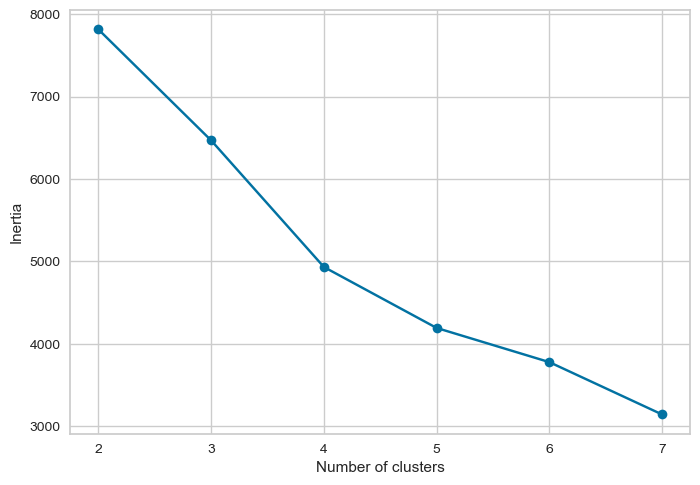

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Model 2 GMM

In [65]:
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

gmm_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(random_state=42))
])


In [66]:
bic_scores = []
aic_scores = []

for k in range(2, 8):
    gmm_pipe.set_params(gmm__n_components=k)
    gmm_pipe.fit(X)

    gmm = gmm_pipe.named_steps['gmm']
    bic_scores.append(gmm.bic(gmm_pipe[:-1].transform(X)))
    aic_scores.append(gmm.aic(gmm_pipe[:-1].transform(X)))

    print(f'k={k}, BIC={bic_scores[-1]:.0f}, AIC={aic_scores[-1]:.0f}')
    
    
# Lower BIC = better

# BIC penalizes too many clusters

# Usually smoother and safer than AIC

k=2, BIC=1003, AIC=834
k=3, BIC=-4705, AIC=-4961
k=4, BIC=-16893, AIC=-17237
k=5, BIC=-17100, AIC=-17531
k=6, BIC=-17495, AIC=-18014
k=7, BIC=-17634, AIC=-18240


In [67]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    gmm_pipe.set_params(gmm__n_components=k)
    labels = gmm_pipe.fit_predict(X)

    X_transformed = gmm_pipe[:-1].transform(X)
    score = silhouette_score(X_transformed, labels)

    print(f'k={k}, silhouette={score:.3f}')

k=2, silhouette=0.199
k=3, silhouette=0.004
k=4, silhouette=0.008
k=5, silhouette=0.008
k=6, silhouette=-0.001
k=7, silhouette=0.003


# MODEL 3 Hierarchical Clustering

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Preprocess (same logic, no leakage)
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)


In [69]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'  # best for numeric risk data
    )
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

    print(f'k={k}, silhouette={score:.3f}')


k=2, silhouette=0.387
k=3, silhouette=0.394
k=4, silhouette=0.403
k=5, silhouette=0.418
k=6, silhouette=0.419
k=7, silhouette=0.423


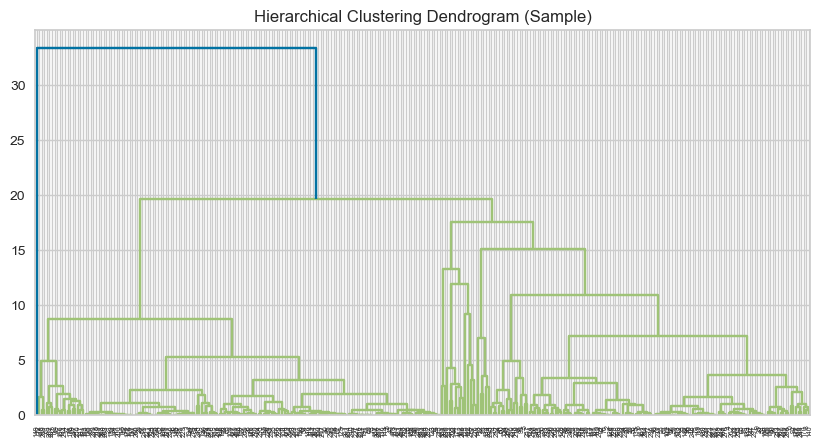

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

sample_idx = np.random.choice(len(X_scaled), size=300, replace=False)
Z = linkage(X_scaled[sample_idx], method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.show()


# model 6 K-Prototypes

In [71]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable


In [72]:
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [73]:
# Step 2: Filter eligible customers
eligible_df = eligible_cus_df[eligible_cus_df['Eligibility_Flag'].str.upper() == 'ELIGIBLE'].copy()

In [74]:
# Step 3: Define features
numeric_features = ['Monthly_Avg_Balance', 'Avg_Monthly_Credit','AGE']
categorical_features = ['OCCUPATION','CUSTOMER_RISK_NAME','GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS','TARGET_DESC']

In [75]:
# Fill missing values
eligible_df[numeric_features] = eligible_df[numeric_features].fillna(0)
for col in categorical_features:
    eligible_df[col] = eligible_df[col].astype(str).fillna('Unknown')

In [76]:
cluster_data = eligible_df[numeric_features + categorical_features].copy()
cat_idx = [cluster_data.columns.get_loc(col) for col in categorical_features]

In [77]:
eligible_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit,Cluster_Name
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,294090.520248,High Financial Capacity,594627.180067,High Salary
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501,Low Salary
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,0.000000,Unknown / Missing Balance Data,0.000000,Unknown / Missing Salary
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-328632.803597,Low Financial Capacity,406128.730574,High Salary
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,2755.104980,Low Financial Capacity,2755.104980,Low Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000,Medium Salary
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250,High Salary
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000,High Salary
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000,Low Salary


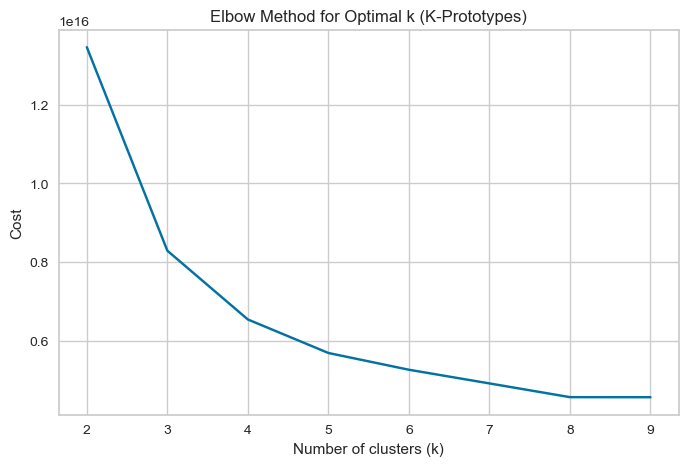

In [78]:
# import matplotlib.pyplot as plt

# cost = []
# K = range(2, 10)  # test 2 to 9 clusters

# for k in K:
#     kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
#     kproto.fit_predict(cluster_data, categorical=cat_idx)
#     cost.append(kproto.cost_)

# # Plot the elbow graph
# plt.figure(figsize=(8,5))
# plt.plot(K, cost, 'bx-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Cost')
# plt.title('Elbow Method for Optimal k (K-Prototypes)')
# plt.show()


In [79]:
!pip install gower


Defaulting to user installation because normal site-packages is not writeable


In [82]:
import pandas as pd
import numpy as np

# Select features
numeric_features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit'
]


categorical_features = [
    'GENDER',
    'EMPLOYMENT_STATUS',
    'MARITAL_STATUS',
    'Employment_Segment','TARGET_DESC','CUSTOMER_RISK_NAME'
]

gower_df = eligible_cus_df[numeric_features + categorical_features].copy()

# Handle missing values
gower_df[numeric_features] = gower_df[numeric_features].fillna(gower_df[numeric_features].median())
gower_df[categorical_features] = gower_df[categorical_features].fillna('Unknown')


In [83]:
import gower

gower_dist = gower.gower_matrix(gower_df)


In [84]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4  # change after dendrogram analysis

hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',
    linkage='average'
)

gower_df['Cluster'] = hc.fit_predict(gower_dist)


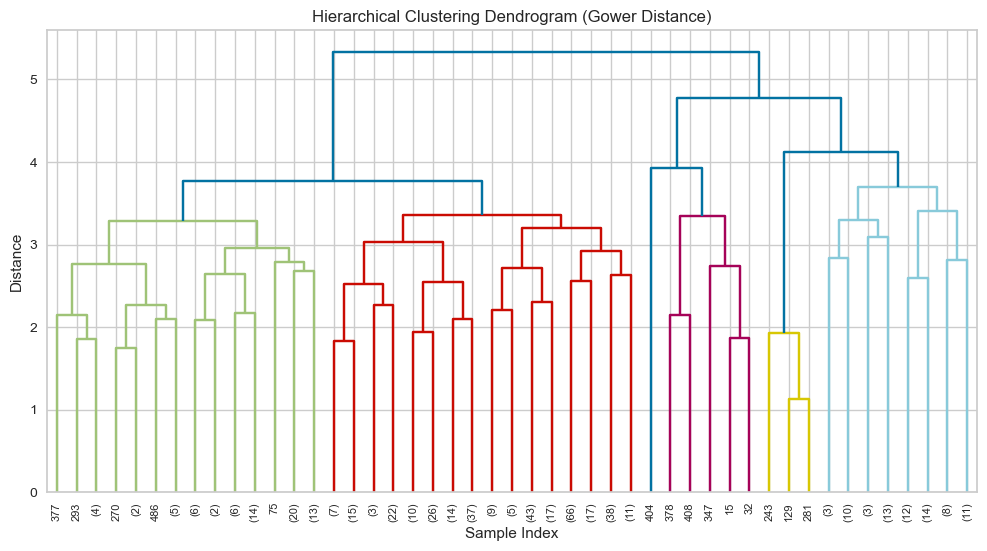

In [85]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sample = gower_df.sample(n=500, random_state=42)
gower_sample = gower.gower_matrix(sample)

Z = linkage(gower_sample, method='average')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Gower Distance)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [86]:
gower_df.groupby('Cluster')[numeric_features].mean()


,AGE,Monthly_Avg_Balance,Avg_Monthly_Credit
Cluster,,,
0,37.078422,139142.338685,761516.770387
1,67.142105,600838.278148,525421.570809
2,25.942529,-37959.294913,239413.343988
3,40.231405,281465.256741,283419.247059


In [87]:
for col in categorical_features:
    print(f"\n{col}")
    print(pd.crosstab(gower_df['Cluster'], gower_df[col], normalize='index'))



GENDER
GENDER     FEMALE      MALE
Cluster                    
0        0.353137  0.646863
1        0.400000  0.600000
2        0.448276  0.551724
3        0.867769  0.132231

EMPLOYMENT_STATUS
EMPLOYMENT_STATUS  BUSINESS  EMPLOYED  FREELANCE   RETIRED  SELF-EMPLOYED  \
Cluster                                                                     
0                  0.106939  0.492395    0.00000  0.002376       0.398289   
1                  0.105263  0.231579    0.00000  0.121053       0.389474   
2                  0.000000  0.000000    0.08046  0.114943       0.000000   
3                  0.000000  0.000000    0.00000  0.000000       0.000000   

EMPLOYMENT_STATUS   STUDENT  UNEMPLOYED   Unknown  
Cluster                                            
0                  0.000000    0.000000  0.000000  
1                  0.000000    0.152632  0.000000  
2                  0.804598    0.000000  0.000000  
3                  0.000000    0.900826  0.099174  

MARITAL_STATUS
MARITAL_STATUS